In [5]:
# Import Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load Train Datasets
Train = pd.read_csv("C:/Users/janan/health/Train-1542865627584.csv")
Train_Beneficiarydata = pd.read_csv("C:/Users/janan/health/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata = pd.read_csv("C:/Users/janan/health/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata = pd.read_csv("C:/Users/janan/health/Train_Outpatientdata-1542865627584.csv")

# Load Test Datasets
Test = pd.read_csv("C:/Users/janan/health/Test-1542969243754.csv")
Test_Beneficiarydata = pd.read_csv("C:/Users/janan/health/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata = pd.read_csv("C:/Users/janan/health/Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata = pd.read_csv("C:/Users/janan/health/Test_Outpatientdata-1542969243754.csv")


In [7]:
print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)


Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


In [8]:
## Lets check shape of Train and Test Data

print('Train Shape:',Train.shape,'\n')
print('Train Sample:\n',Train.head(2),'\n')

print('\n Test Shape:',Test.shape,'\n')
print('Test Sample: \n',Test.head(2))

Train Shape: (5410, 2) 

Train Sample:
    Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes 


 Test Shape: (1353, 1) 

Test Sample: 
    Provider
0  PRV51002
1  PRV51006


In [9]:
print(Train.Provider.value_counts(sort=True,ascending=False).head(2))  # number of unique providers in train data.Check for duplicates

print('\n Total missing values in Train :',Train.isna().sum().sum())

print('\n Total missing values in Test :',Test.isna().sum().sum())

Provider
PRV51001    1
PRV55516    1
Name: count, dtype: int64

 Total missing values in Train : 0

 Total missing values in Test : 0


In [10]:
Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [11]:
Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [12]:
Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [13]:
Train_Beneficiarydata.head(1)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70


In [14]:
Test_Beneficiarydata.head(1)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70


In [15]:
Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)


Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

In [16]:
## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.

Train_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)


Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)

In [17]:
Train_Beneficiarydata.head(2)
Test_Beneficiarydata.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0


In [18]:
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Train_Beneficiarydata.loc[:,'WhetherDead'].head(7)


Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Test_Beneficiarydata.loc[:,'WhetherDead'].head(3)

0    0.0
1    1.0
2    0.0
Name: WhetherDead, dtype: float64

In [19]:
#Lets check missing values in each column in inpatient data
Train_Inpatientdata.isna().sum()

Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [20]:
Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1


Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

In [21]:

## Lets check Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
Train_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())
Test_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [22]:
Train_Outpatientdata.isna().sum()

Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [23]:
print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 27)
Shape of Train_Inpatientdata data : (40474, 31)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 27)
Shape of Test_Inpatientdata data : (9551, 31)
Shape of Test_Outpatientdata data : (125841, 27)


In [24]:
Merge_Outpatient=Train_Outpatientdata.columns
print(Merge_Outpatient)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


In [25]:

#Merge Inpatient and Outpatinet data and create dataset for all patients.

# Lets make union of Inpatienta and outpatient data .
# We will use all keys in outpatient data as we want to make union and dont want duplicate columns from both tables.

Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')


Test_Allpatientdata=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [26]:
print('Train_Allpatientdata',Train_Allpatientdata.shape)
print('Test_Allpatientdata',Test_Allpatientdata.shape)

Train_Allpatientdata (558211, 31)
Test_Allpatientdata (135392, 31)


In [27]:
Train_Allpatientdata.head(4)
Test_Allpatientdata.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays
0,BENE100001,CLM129501,2009-01-10,2009-01-10,PRV52050,1100,PHY364771,NaN,NaN,V074,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
1,BENE100002,CLM623189,2009-10-10,2009-10-10,PRV52083,60,PHY402651,NaN,PHY315572,V5867,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
2,BENE100004,CLM546697,2009-08-26,2009-09-15,PRV53275,1500,PHY364921,NaN,PHY364921,V5631,...,NaN,NaN,NaN,NaN,200.0,NaN,NaT,NaT,NaN,NaN
3,BENE100004,CLM63603,2009-08-12,2009-08-17,PRV52959,11000,PHY410241,NaN,NaN,69514,...,NaN,NaN,NaN,NaN,1068.0,0539,2009-08-12,2009-08-17,579,6.0


In [28]:
Train_AllPatientDetailsdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [29]:
print('Shape of All Patient Details Train : ',Train_AllPatientDetailsdata.shape)
Train_AllPatientDetailsdata.head()

print('Shape of All Patient Details Test : ',Test_AllPatientDetailsdata.shape)
Test_AllPatientDetailsdata.head(2)

Shape of All Patient Details Train :  (558211, 57)
Shape of All Patient Details Test :  (135392, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE100001,CLM129501,2009-01-10,2009-01-10,PRV52050,1100,PHY364771,NaN,NaN,V074,...,1,1,0,1,0,0,2530,540,70.0,0.0
1,BENE100002,CLM623189,2009-10-10,2009-10-10,PRV52083,60,PHY402651,NaN,PHY315572,V5867,...,1,0,0,1,12250,1068,1760,660,71.0,0.0


In [30]:
Train_ProviderWithPatientDetailsdata=pd.merge(Train,Train_AllPatientDetailsdata,on='Provider')

Test_ProviderWithPatientDetailsdata=pd.merge(Test,Test_AllPatientDetailsdata,on='Provider')

In [31]:
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.head()

print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.head(2)

Shape of Train Provider with Patient Details data :- (558211, 58)
Shape of Test Provider with Patient Details data :- (135392, 57)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51002,BENE101165,CLM304833,2009-04-15,2009-04-15,70,PHY410547,NaN,NaN,2722,...,1,1,0,0,0,0,2230,50,79.0,0.0
1,PRV51002,BENE102518,CLM529049,2009-08-16,2009-08-16,20,PHY315513,PHY418464,PHY354831,42732,...,1,0,0,0,3000,1068,680,160,85.0,0.0


In [33]:
Train_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Train_ProviderWithPatientDetailsdata)


print('Percent missing values in Test Provider with patient details data :\n')
Test_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Test_ProviderWithPatientDetailsdata)

Percent missing values in Test Provider with patient details data :



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

In [35]:
Train_ProviderWithPatientDetailsdata.dtypes
Test_ProviderWithPatientDetailsdata.dtypes

Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object
ClmProcedureCode_1                        float64


Percent Distribution of Potential Fraud class:- 
 PotentialFraud
No     61.878931
Yes    38.121069
Name: count, dtype: float64


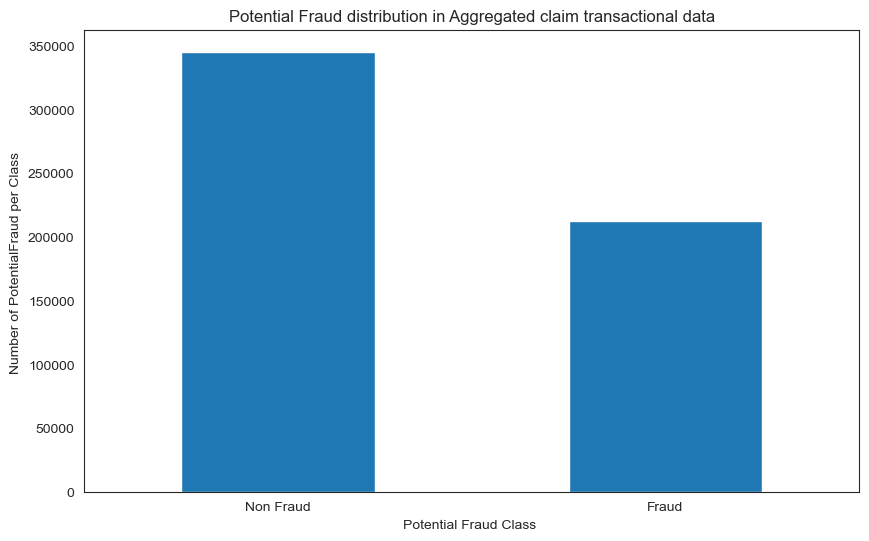

In [39]:
sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(Train_ProviderWithPatientDetailsdata['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(Train_ProviderWithPatientDetailsdata))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudDistributionInMergedData')

Percent Distribution of Potential Fraud class:- 
 PotentialFraud
No     90.64695
Yes     9.35305
Name: count, dtype: float64


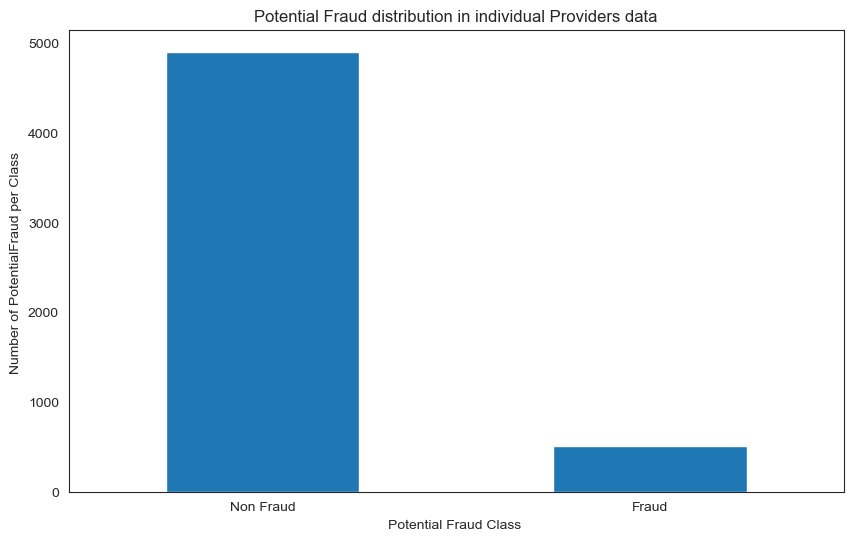

In [40]:
count_classes_provider = pd.value_counts(Train['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes_provider*100/len(Train))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes_provider.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in individual Providers data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")


plt.savefig('PotentialFraudDistributionImbalance')

In [43]:
print('Providers NonFraud|Fraud Class Percent Distribution in Whole dataset :\n',count_classes/len(Train_ProviderWithPatientDetailsdata)*100)


Providers NonFraud|Fraud Class Percent Distribution in Whole dataset :
 PotentialFraud
No     61.878931
Yes    38.121069
Name: count, dtype: float64


In [51]:
print('Providers NonFraud|Fraud Class Percent Distribution :\n',count_classes_provider/len(Train)*100)


Providers NonFraud|Fraud Class Percent Distribution :
 PotentialFraud
No     90.64695
Yes     9.35305
Name: count, dtype: float64


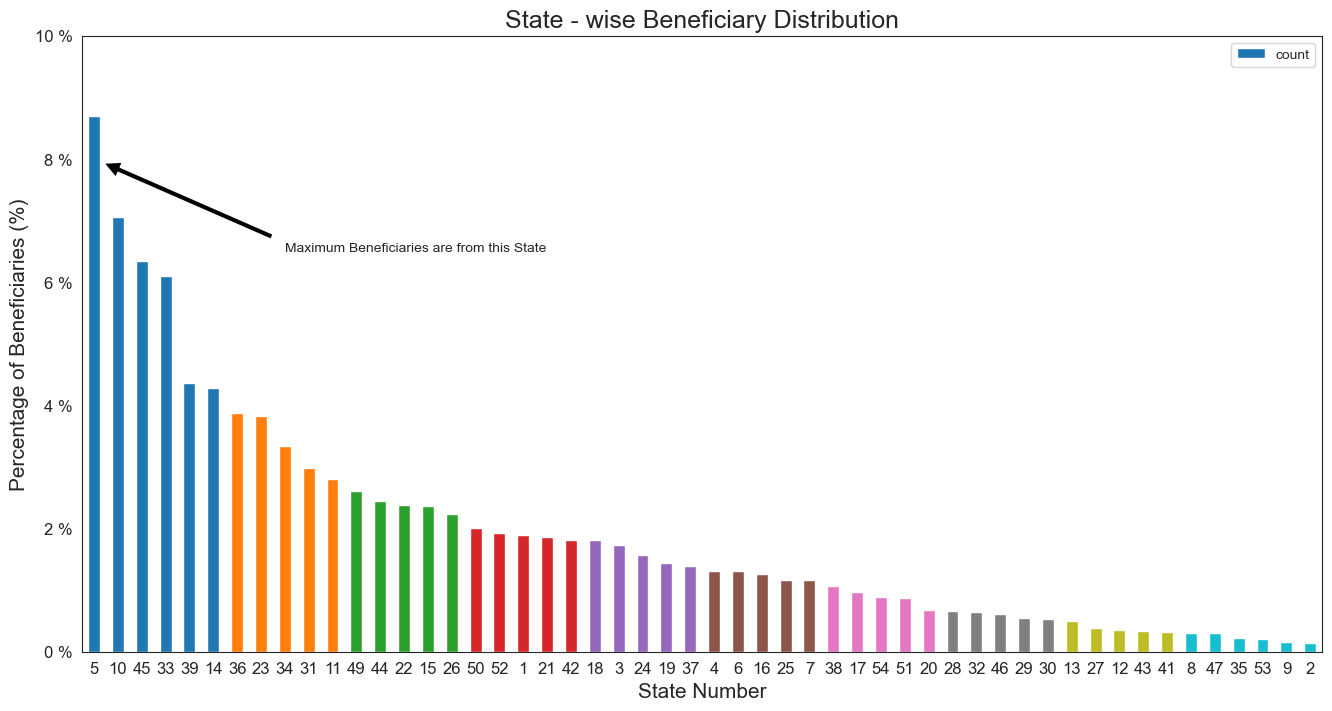

<Figure size 640x480 with 0 Axes>

In [58]:
count_States = pd.value_counts(Train_Beneficiarydata['State'], sort=True)

# Define a color palette
color_palette = plt.cm.get_cmap('tab10', len(count_States))

# Calculate percentage distribution and plot the barplot with colors
(count_States * 100 / len(Train_Beneficiarydata)).plot(kind='bar', rot=0, figsize=(16, 8), fontsize=12, legend=True, color=color_palette(range(len(count_States))))

# Adding annotation
plt.annotate('Maximum Beneficiaries are from this State', xy=(0.01, 8), xytext=(8, 6.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Adjusting tick locations and labels
plt.yticks(np.arange(0, 11, 2), ('0 %', '2 %', '4 %', '6 %', '8 %', '10 %'))

plt.title("State - wise Beneficiary Distribution", fontsize=18)
plt.xlabel("State Number", fontsize=15)
plt.ylabel("Percentage of Beneficiaries (%)", fontsize=15)
plt.show()

# Save the plot
plt.savefig('StateWiseBeneficiaryDistribution.png')

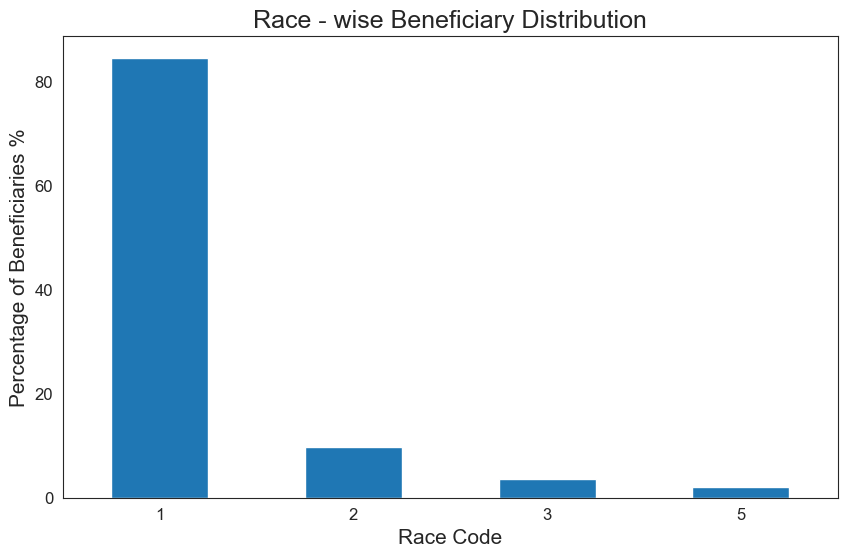

<Figure size 640x480 with 0 Axes>

In [59]:
count_Race = pd.value_counts(Train_Beneficiarydata['Race'], sort = True)

#Drawing a barplot
(count_Race*100/len(Train_Beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.yticks(np.arange(0,100,20))#, ('0 %','20 %', '40 %', '60 %', '80 %', '100%'))
plt.title("Race - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)

plt.show()

plt.savefig('RacewiseBeneficiaryDistribution')

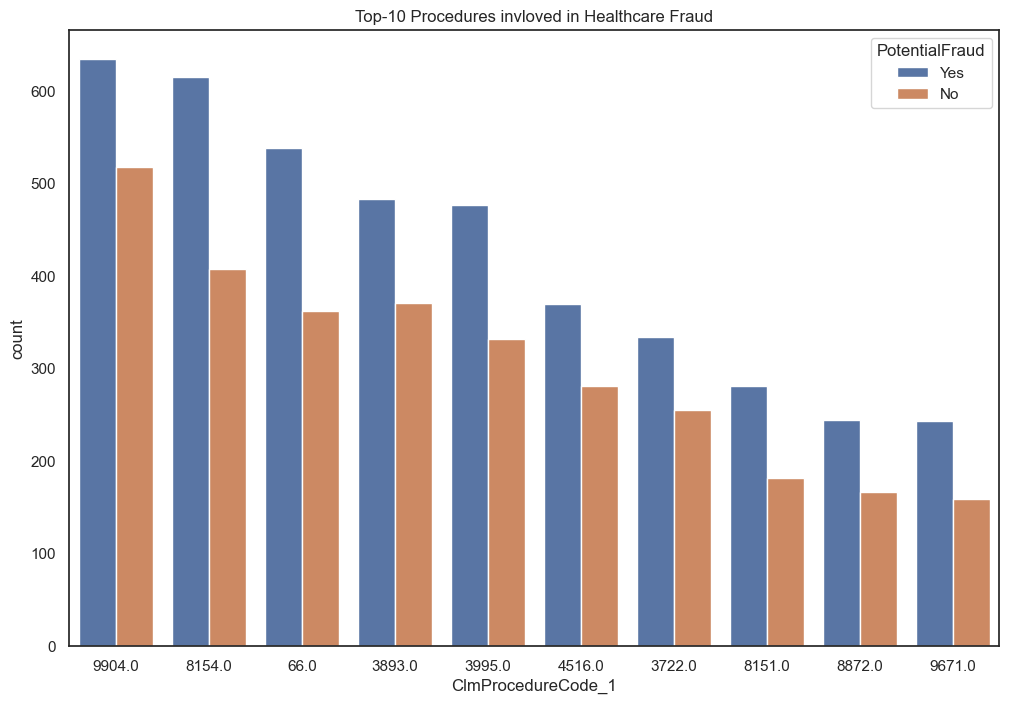

<Figure size 1200x800 with 0 Axes>

In [60]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=Train_ProviderWithPatientDetailsdata
              ,order=Train_ProviderWithPatientDetailsdata.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')

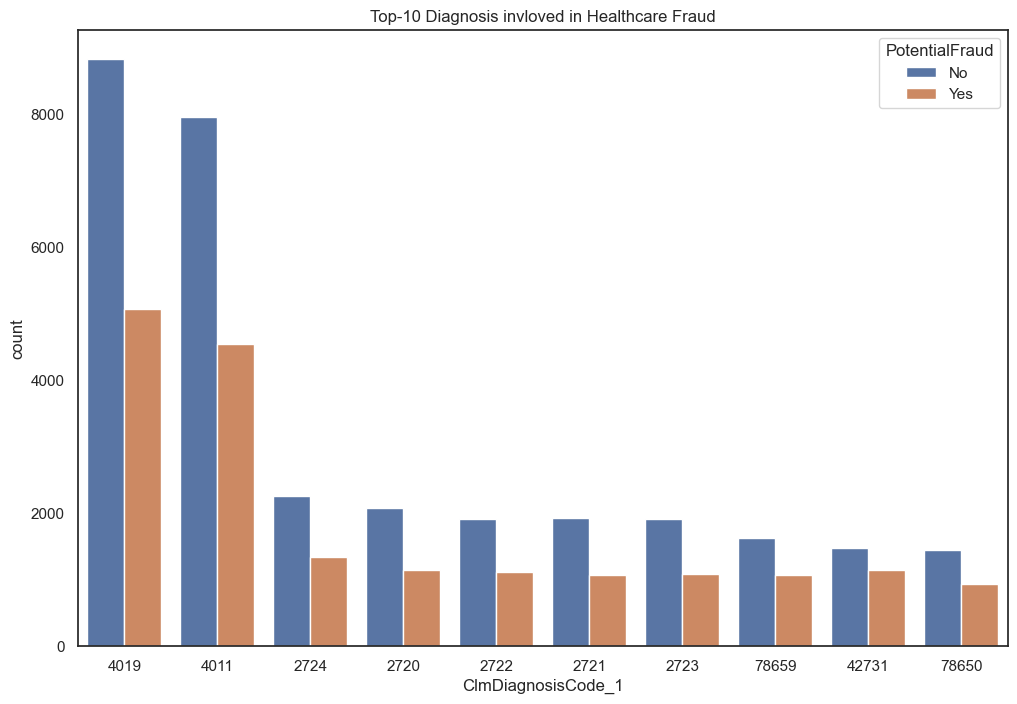

<Figure size 1200x800 with 0 Axes>

In [61]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=Train_ProviderWithPatientDetailsdata
              ,order=Train_ProviderWithPatientDetailsdata.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.show()

plt.savefig('TopDiagnosisInnvlovedinHealthcareFraud')

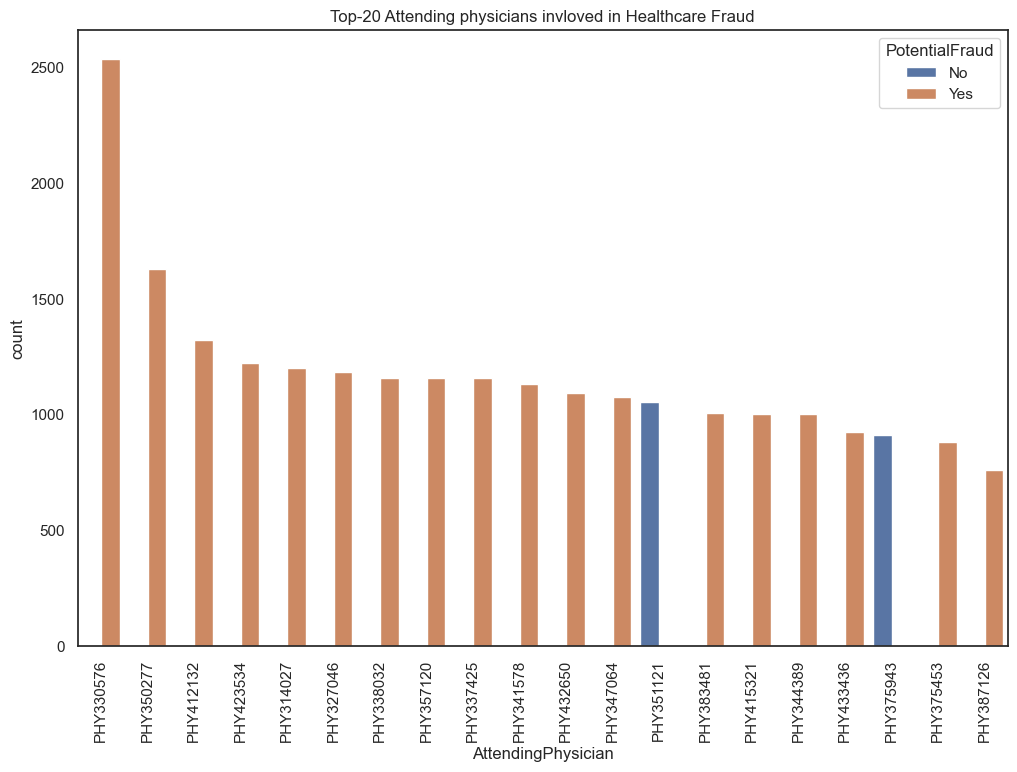

<Figure size 1200x800 with 0 Axes>

In [62]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=Train_ProviderWithPatientDetailsdata
              ,order=Train_ProviderWithPatientDetailsdata.AttendingPhysician.value_counts().iloc[:20].index)

    
plt.title('Top-20 Attending physicians invloved in Healthcare Fraud')
plt.xticks(rotation=90)
plt.show()

plt.savefig('TopAttendingphysiciansinvlovedinHealthcareFraud')

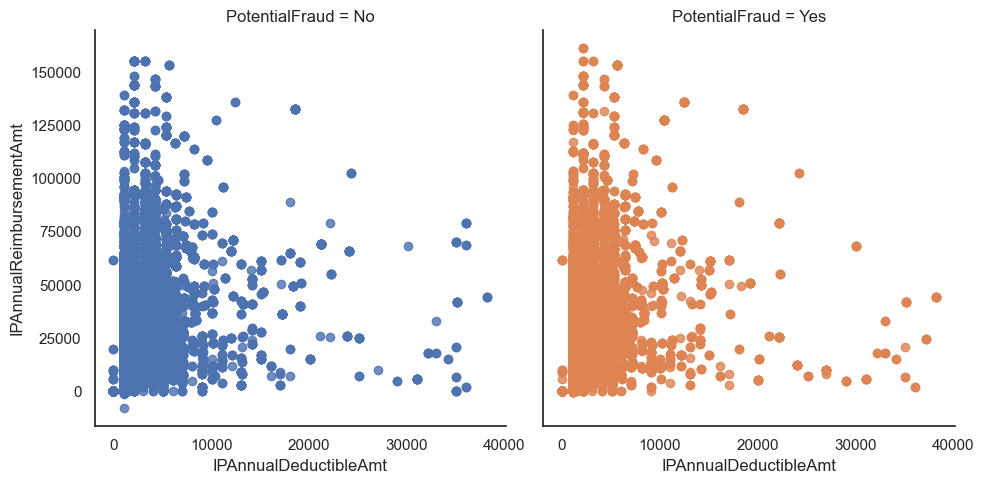

In [63]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderWithPatientDetailsdata)


#plt.title('IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories')

plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')

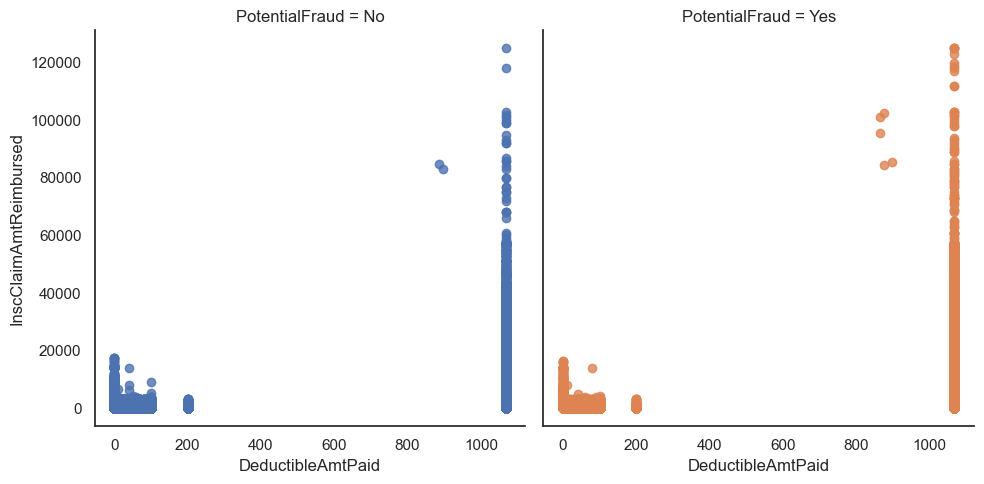

In [64]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderWithPatientDetailsdata)


plt.savefig('DeductibleAmtPaidandInsClaimAmtReimbursed')

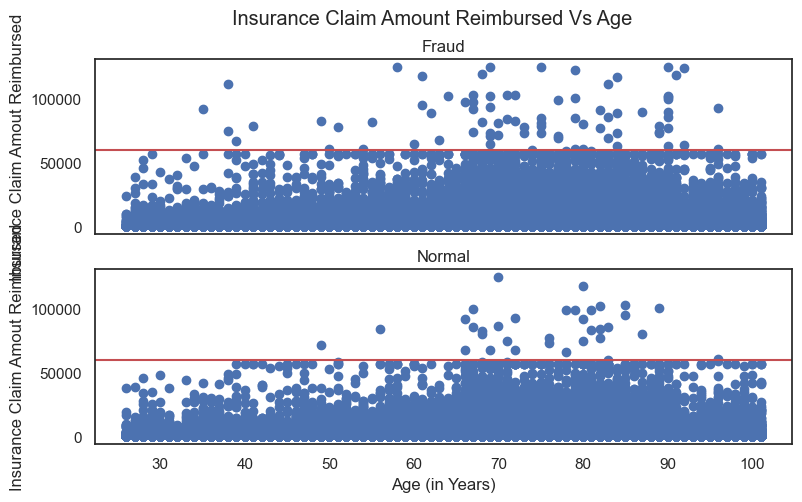

In [65]:
sns.set(rc={'figure.figsize':(9,5)},style='white')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Insurance Claim Amount Reimbursed Vs Age')

ax1.scatter(Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='Yes'].Age, 
            Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Insurance Claim Amout Reimbursed')

ax2.scatter(Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='No'].Age, 
            Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='No'].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=60000,c='r')
ax2.set_xlabel('Age (in Years)')
ax2.set_ylabel('Insurance Claim Amout Reimbursed')

plt.show()
f.savefig('AgeVsClaimAmtReimbursed')

In [86]:
Test_ProviderWithPatientDetailsdata.iloc[[135391]]

,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
135391,PRV57750,BENE99685,CLM541392,2009-08-23,2009-08-23,20,PHY323525,NaN,NaN,30593,...,1,0,1,0,0,0,1930,820,71.0,0.0


In [87]:
Train_ProviderWithPatientDetailsdata.iloc[[558210]]

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
558210,PRV57763,No,BENE97084,CLM662158,2009-11-02,2009-11-02,70,PHY321072,NaN,NaN,...,0,0,0,0,0,0,5870,1880,84.0,0.0


In [88]:
Test_ProviderWithPatientDetailsdata_copy=Test_ProviderWithPatientDetailsdata


In [89]:
print('Shape of Test Copy :-',Test_ProviderWithPatientDetailsdata_copy.shape)


Shape of Test Copy :- (135392, 57)


In [91]:
col_merge=Test_ProviderWithPatientDetailsdata.columns


In [97]:
Test_ProviderWithPatientDetailsdata=pd.concat([Test_ProviderWithPatientDetailsdata,
                                               Train_ProviderWithPatientDetailsdata[col_merge]])

In [99]:
print("Shape of Test After Concatenation",Test_ProviderWithPatientDetailsdata.shape)

print("Expected rows after addition",135392+558211)

Shape of Test After Concatenation (693603, 57)
Expected rows after addition 693603


In [101]:
Test_ProviderWithPatientDetailsdata.iloc[[135392]]


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51001,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,PHY378091,PHY389113,4241,...,1,0,1,0,143800,4272,880,70,80.0,0.0


In [103]:
Train_ProviderWithPatientDetailsdata["PerProviderAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_Age"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['Age'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartACov"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartBCov"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerProviderAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_Age"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['Age'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartACov"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartBCov"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['AdmitForDays'].transform('mean')

In [104]:
print('Train',Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.iloc[:,-10:].head(2)

print("Test ",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.iloc[:,-10:].head(4)

Train (558211, 68)
Test  (693603, 67)


,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays
0,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,72.365854,11.82439,12.0,NaN
1,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,72.365854,11.82439,12.0,NaN
2,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,72.365854,11.82439,12.0,NaN
3,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,72.365854,11.82439,12.0,NaN


In [105]:
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['AdmitForDays'].transform('mean')

In [108]:
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

In [109]:
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

In [110]:
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')

In [111]:
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

In [112]:
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

In [113]:
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')

In [114]:
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')

In [115]:
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')

In [116]:
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

In [117]:
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

In [118]:
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

In [119]:
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

In [120]:
Train_ProviderWithPatientDetailsdata["ClmCount_Provider"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_AttendingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_OtherPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_OperatingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_2"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_3"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_4"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_5"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_2"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_3"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_4"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_5"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_6"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_7"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_8"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_9"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_DiagnosisGroupCode"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OtherPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OperatingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')


Test_ProviderWithPatientDetailsdata["ClmCount_Provider"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_AttendingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_OtherPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_OperatingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_2"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_3"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_4"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_5"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_2"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_3"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_4"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_5"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_6"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_7"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_8"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_9"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_DiagnosisGroupCode"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OtherPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OperatingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')

In [121]:
print('Train_ProviderWithPatientDetailsdata shape-',Train_ProviderWithPatientDetailsdata.shape)
print('Test_ProviderWithPatientDetailsdata shape-',Test_ProviderWithPatientDetailsdata.shape)

Train_ProviderWithPatientDetailsdata shape- (558211, 188)
Test_ProviderWithPatientDetailsdata shape- (693603, 187)


In [122]:
diagnosiscode_2chars=Train_ProviderWithPatientDetailsdata['ClmDiagnosisCode_1'].astype(str).str[0:2]

diagnosiscode_2chars.unique()

array(['42', 'V7', '59', '24', '78', '41', '56', '79', '04', '35', '85',
       '51', 'V4', '29', '03', 'na', '71', 'V1', '27', '60', '50', '57',
       '28', '91', '55', 'V5', '00', '15', '99', '82', '72', '19', '40',
       '58', '73', '70', '25', '46', '49', '44', '45', '18', '16', '68',
       '61', '47', '20', '33', '31', '88', '48', '53', '43', '36', 'V6',
       '83', 'E8', '02', '32', '17', 'V0', '34', '62', 'V8', '11', '30',
       '38', '39', '80', '93', '52', '84', '89', '23', '94', '54', 'V2',
       '26', '37', '87', '21', '05', '69', '81', '90', '12', '92', '63',
       '64', '95', '22', '07', '06', '13', '74', '14', '98', '97', '08',
       '66', '75', 'E9', '09', '96', '10', '77', '86', '65', '67', '01',
       '76'], dtype=object)

In [123]:
x=diagnosiscode_2chars.sort_values(ascending=True)
x.unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98',
       '99', 'E8', 'E9', 'V0', 'V1', 'V2', 'V4', 'V5', 'V6', 'V7', 'V8',
       'na'], dtype=object)

In [124]:
cols1 = Train_ProviderWithPatientDetailsdata.select_dtypes([np.number]).columns
cols2 = Train_ProviderWithPatientDetailsdata.select_dtypes(exclude = [np.number]).columns

Train_ProviderWithPatientDetailsdata[cols1] = Train_ProviderWithPatientDetailsdata[cols1].fillna(value=0)
Test_ProviderWithPatientDetailsdata[cols1]=Test_ProviderWithPatientDetailsdata[cols1].fillna(value=0)
print('Test_ProviderWithPatientDetailsdata shape:',Test_ProviderWithPatientDetailsdata.shape)

Test_ProviderWithPatientDetailsdata shape: (693603, 187)


In [128]:
cols=Train_ProviderWithPatientDetailsdata.columns
cols[:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']

Train_category_removed=Train_ProviderWithPatientDetailsdata.drop(axis=1,columns=remove_these_columns)
Test_category_removed=Test_ProviderWithPatientDetailsdata.drop(axis=1,columns=remove_these_columns)

In [139]:
print('Train Shape :',Train_category_removed.shape)
print('Test Shape : ',Test_category_removed.shape)
print("Train Missing Values",Train_category_removed.isnull().sum().sum())
print("Test Missing Values",Test_category_removed.isnull().sum().sum())

Train Shape : (558211, 157)
Test Shape :  (693603, 156)
Train Missing Values 0
Test Missing Values 0


In [144]:
Train_category_removed.Gender=Train_category_removed.Gender.astype('category')
Test_category_removed.Gender=Test_category_removed.Gender.astype('category')

Train_category_removed.Race=Train_category_removed.Race.astype('category')
Test_category_removed.Race=Test_category_removed.Race.astype('category')

In [147]:
Train_category_removed=pd.get_dummies(Train_category_removed,columns=['Gender','Race'],drop_first=True)
Test_category_removed=pd.get_dummies(Test_category_removed,columns=['Gender','Race'],drop_first=True)

In [149]:
Train_category_removed.head().T
Test_category_removed.iloc[135391:135393]

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
135391,PRV57750,20,0.0,0.0,0,12,12,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,True,False,False,False
0,PRV51001,42000,1068.0,15.0,1,12,12,0,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,True,False,False,False


In [153]:
Train_category_removed.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Train_category_removed.head()
Train_category_removed.PotentialFraud=Train_category_removed.PotentialFraud.astype('int64')
Train_category_removed.PotentialFraud.dtypes
Train_category_removed.PotentialFraud.min()

0

In [155]:
Train_category_removed.PotentialFraud.max()

1

In [157]:
print('Test Shape before removing',Test_category_removed.shape)


Test Shape before removing (693603, 158)


In [159]:
Test_category_removed=Test_category_removed.iloc[:135392]   ##Remove train data from appended test data


In [161]:
Test_category_removed.tail() 

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
135387,PRV57750,50,0.0,0.0,0,12,12,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,True,True,False,False
135388,PRV57750,0,0.0,0.0,0,12,12,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,False,False,False,True
135389,PRV57750,100,0.0,0.0,0,12,12,0,1,0,...,0.0,1.0,1.0,0.0,1.0,0.0,False,False,False,False
135390,PRV57750,20,0.0,0.0,0,12,12,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,False,False,False,False
135391,PRV57750,20,0.0,0.0,0,12,12,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,True,False,False,False


In [163]:
print('Test Shape before removing',Test_category_removed.shape)


Test Shape before removing (135392, 158)


In [165]:
Train_category_removed_groupedbyProv_PF = Train_category_removed.groupby(['Provider', 'PotentialFraud'], as_index=False).sum(numeric_only=True)
Test_category_removed_groupedbyProv_PF = Test_category_removed.groupby(['Provider'], as_index=False).sum(numeric_only=True)

In [167]:
print('Providers in Train:' ,Train_category_removed_groupedbyProv_PF.shape)
print('Providers in Test :',Test_category_removed_groupedbyProv_PF.shape)

Providers in Train: (5410, 158)
Providers in Test : (1353, 157)


In [169]:
Train_category_removed_groupedbyProv_PF.head(3)
Test_category_removed_groupedbyProv_PF.head(3)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51002,53790,380.0,0.0,2424,2460,79,108,72,25,...,0.0,202.0,30.0,0.0,204.0,0.0,134,30,2,4
1,PRV51006,30720,0.0,0.0,1224,1224,35,69,50,15,...,0.0,99.0,26.0,0.0,99.0,0.0,59,26,0,0
2,PRV51009,27230,1238.0,8.0,468,468,8,17,19,1,...,2.0,40.0,24.0,2.0,41.0,2.0,23,6,0,0


In [171]:
print('Train shape:',Train_category_removed_groupedbyProv_PF.shape)


Train shape: (5410, 158)


In [173]:
Train_category_removed_groupedbyProv_PF.head(3)


,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30.0,300,300,15,19,17,...,2.0,24.0,5.0,2.0,24.0,2.0,16,4,0,0
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,...,39.0,132.0,45.0,39.0,132.0,39.0,78,24,0,1
2,PRV51004,0,52170,310.0,0.0,1768,1782,64,88,50,...,0.0,143.0,27.0,0.0,143.0,0.0,103,24,5,0


In [175]:
X=Train_category_removed_groupedbyProv_PF.drop(axis=1,columns=['Provider','PotentialFraud'])
y=Train_category_removed_groupedbyProv_PF['PotentialFraud']

In [177]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler (you can replace this with MinMaxScaler if needed)
sc = StandardScaler()

# Fit the scaler on the training data
sc.fit(X)

# Transform the training data
X_std = sc.transform(X)

# Transform the test data (excluding the first column, which is likely categorical)
X_teststd = sc.transform(Test_category_removed_groupedbyProv_PF.iloc[:, 1:])



In [178]:
print('X Shape:',X_std.shape)


X Shape: (5410, 156)


In [181]:
# Import the required function
from sklearn.model_selection import train_test_split

# Now split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_std, y, test_size=0.3, random_state=101, stratify=y, shuffle=True
)

# After this, you can proceed with your model training/validation steps.


In [183]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (3787, 156)
y_train : (3787,)
X_val : (1623, 156)
y_val : (1623,)


In [185]:
print('X_teststd',X_teststd.shape)


X_teststd (1353, 156)


In [186]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

log.fit(X_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=123)

In [189]:
log_train_pred_probability=log.predict_proba(X_train)
log_val_pred_probability=log.predict_proba(X_val)

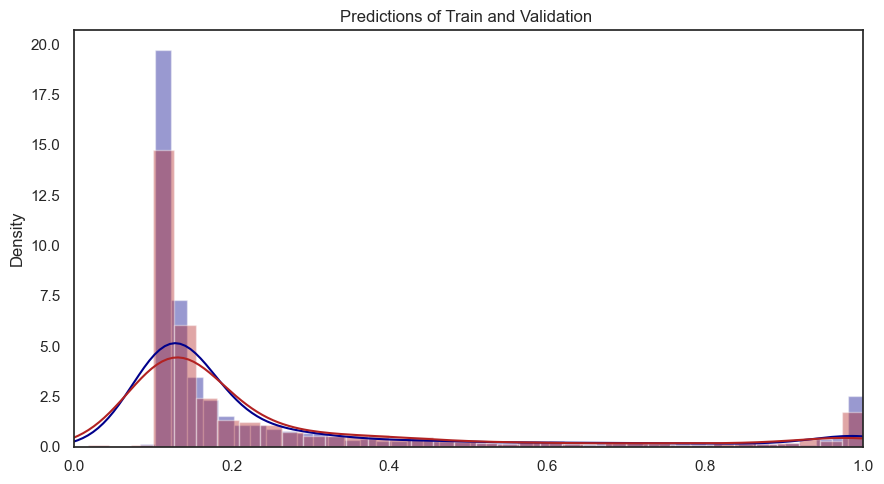

In [191]:
fig = plt.figure(figsize=(9,5))

sns.distplot(log.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(log.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predictions of Train and Validation ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

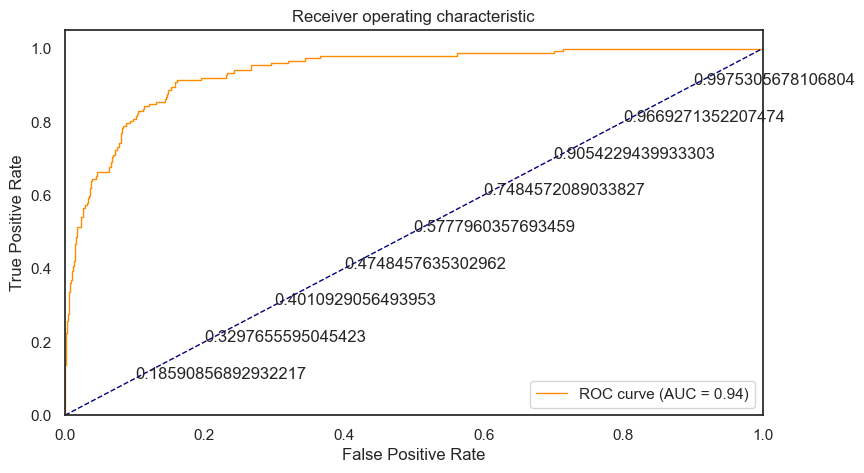

In [193]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,log.predict_proba(X_val)[:,1])         #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 12})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [195]:
fpr, tpr, thresholds =roc_curve(y_val, log.predict_proba(X_val)[:,1],pos_label=1)     #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.935789


Text(0.5, 1.0, 'Precision Vs Recall')

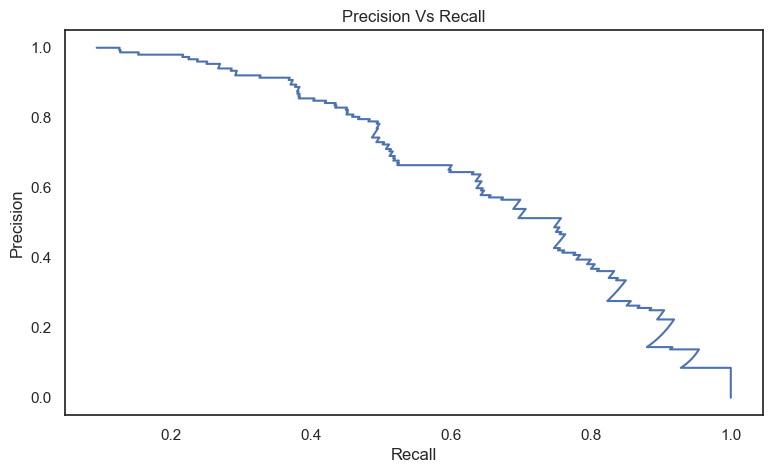

In [197]:
precision, recall, _ = precision_recall_curve(y_val, log.predict_proba(X_val)[:,1])

plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

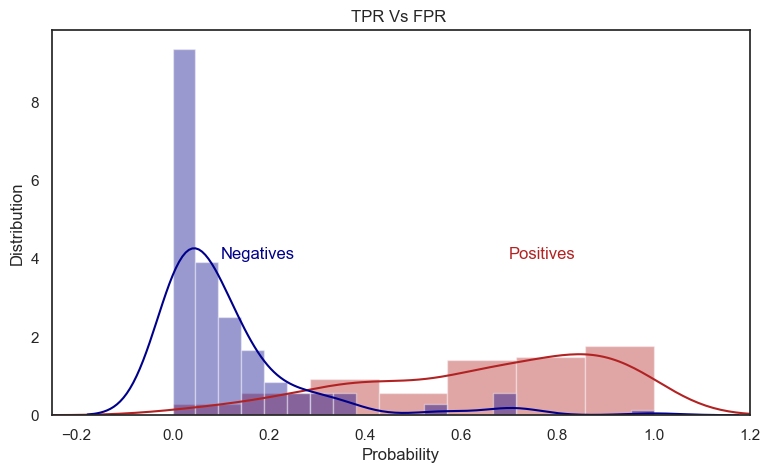

In [199]:
fig = plt.figure(figsize=(9,5))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [201]:
log_train_pred_60=(log.predict_proba(X_train)[:,1]>0.60).astype(bool)
log_val_pred_60=(log.predict_proba(X_val)[:,1]>0.60).astype(bool) 

In [203]:
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, log_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, log_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, log_val_pred_60))

Confusion Matrix Train : 
 [[ 270   84]
 [ 210 3223]]
Confusion Matrix Val: 
 [[ 103   49]
 [  93 1378]]
Accuracy Train:  0.922365988909427
Accuracy Val:  0.9125077017868145
Sensitivity Train :  0.7627118644067796
Sensitivity Val:  0.6776315789473685
Specificity Train:  0.9388290125254879
Specificity Val:  0.9367777022433719
Kappa Value : 0.5438304105142315
AUC         : 0.8072046405953702
F1-Score Train  :  0.6474820143884892
F1-Score Val  :  0.5919540229885057


In [205]:
log_test_pred_60 = (log.predict_proba(X_teststd)[:,1]>0.60).astype(bool)
log_test_pred=pd.DataFrame(log_test_pred_60)
log_test_pred.head(2)

,0
0,False
1,False


In [207]:
Replacement = {1:'Yes',0:'No'}

Labels=log_test_pred[0].apply(lambda x : Replacement[x])
Labels.value_counts()    #Check count of Predictions

0
No     1182
Yes     171
Name: count, dtype: int64

In [209]:
from sklearn.ensemble import RandomForestClassifier


In [211]:
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4) 


In [213]:
rfc.fit(X_train,y_train)  


RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=123)

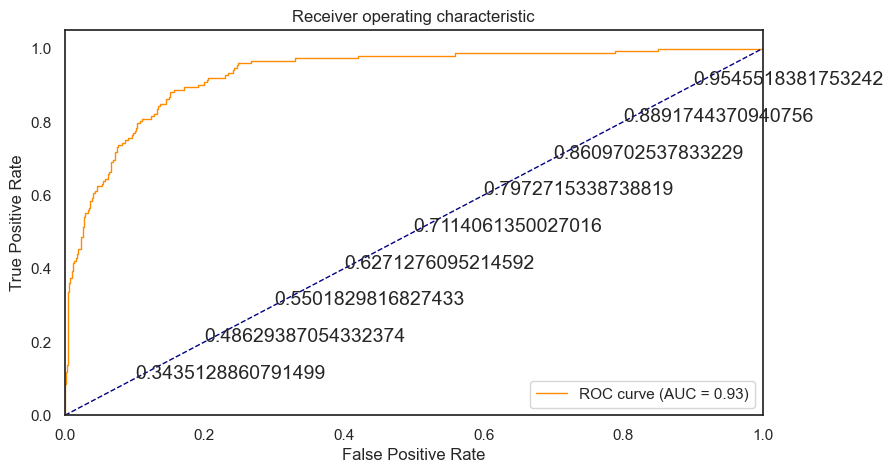

In [214]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, rfc.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

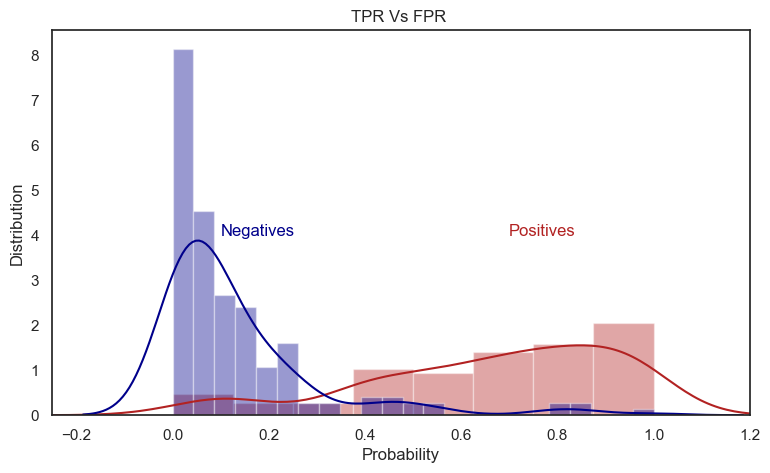

In [215]:
fig = plt.figure(figsize=(9,5))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [219]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)   # Set threshold to 0.5
rfc_val_pred = (rfc.predict_proba(X_val)[:,1]>0.5).astype(bool)# Set threshold to 0.5

In [221]:
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, rfc_val_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, rfc_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, rfc_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_val, rfc_val_pred))

Confusion Matrix Train : 
 [[ 319   35]
 [ 389 3044]]
Confusion Matrix Test: 
 [[ 124   28]
 [ 182 1289]]
Accuracy Train :  0.8880380248217586
Accuracy Test :  0.8706099815157117
Sensitivity :  0.8157894736842105
Specificity :  0.876274643099932
Kappa Value : 0.47589611108548224
AUC         : 0.8460320583920713
F1-Score Train 0.60075329566855
F1-Score Validation :  0.5414847161572053


In [223]:
#Random Forest : Feature Importance

feature_list = list(Test_category_removed_groupedbyProv_PF.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list[1:], importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('Top -20 features impacting Random forest model and their importance score :- \n',)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:15]];

Top -20 features impacting Random forest model and their importance score :- 

Variable: PerProviderAvg_InscClaimAmtReimbursed Importance: 0.09
Variable: InscClaimAmtReimbursed Importance: 0.07
Variable: PerAttendingPhysicianAvg_InscClaimAmtReimbursed Importance: 0.07
Variable: PerOperatingPhysicianAvg_InscClaimAmtReimbursed Importance: 0.06
Variable: PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed Importance: 0.04
Variable: PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid Importance: 0.04
Variable: PerClmDiagnosisCode_1Avg_DeductibleAmtPaid Importance: 0.04
Variable: PerOperatingPhysicianAvg_IPAnnualReimbursementAmt Importance: 0.03
Variable: ClmCount_Provider_ClmDiagnosisCode_7 Importance: 0.03
Variable: ClmCount_Provider_ClmDiagnosisCode_8 Importance: 0.03
Variable: ClmCount_Provider_ClmDiagnosisCode_9 Importance: 0.03
Variable: DeductibleAmtPaid    Importance: 0.02
Variable: AdmitForDays         Importance: 0.02
Variable: PerProviderAvg_DeductibleAmtPaid Importance: 0.02
Variable: 

In [225]:
#Random Forest : Prediction on Unseen Data

## Lets predict on Test data

rfc_test_pred = rfc.predict(X_teststd)

In [227]:
rfc_test_pred=pd.DataFrame(rfc_test_pred)
rfc_test_pred.head(2)

,0
0,0
1,0


In [229]:
Replacement = {1:'Yes',0:'No'}

Labels=rfc_test_pred[0].apply(lambda x : Replacement[x])

In [231]:
Labels.value_counts()


0
No     1094
Yes     259
Name: count, dtype: int64

In [233]:
submission_log=pd.DataFrame({"Provider":Test_category_removed_groupedbyProv_PF.Provider})
submission_log['PotentialFraud']=Labels
submission_log.shape

(1353, 2)

In [235]:
print('Submission Shape:',submission_log.shape)


Submission Shape: (1353, 2)


In [237]:
submission_log.to_csv("Submission_Logistic_Regression_F1_60_Threshold_60Prcnt.csv",index=False)
submission_log.PotentialFraud.value_counts()

PotentialFraud
No     1094
Yes     259
Name: count, dtype: int64

In [239]:
!pip install xgboost


In [240]:
from collections import Counter
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pprint

In [241]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Define classifiers with proper probability=True for SVC
clfs = {
    'svm1': SVC(C=0.01, kernel='linear', probability=True),  # Corrected probability=True
    'svm2': SVC(C=0.01, kernel='rbf', probability=True),     # Corrected probability=True
    'svm3': SVC(C=0.01, kernel='poly', degree=2, probability=True),  # Corrected probability=True
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(class_weight='balanced'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(class_weight='balanced'),
    'xgb': XGBClassifier(booster='gbtree')
}

f1_scores = dict()

# Iterate over classifiers, train and compute F1 score
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    
    # Predict probabilities for validation set
    y_pred = (clf.predict_proba(X_val)[:, 1] > 0.5).astype(bool)
    
    # Compute F1 score, ensuring true labels are first
    f1_scores[clf_name] = f1_score(y_val, y_pred)

pprint.pprint(f1_scores) 



svm1
svm2
svm3
ada
dtc
gbc
lr
xgb
{'ada': 0.5309090909090909,
 'dtc': 0.4315068493150685,
 'gbc': 0.5905511811023622,
 'lr': 0.6045340050377834,
 'svm1': 0.4953271028037383,
 'svm2': 0.5573770491803278,
 'svm3': 0.41,
 'xgb': 0.536}


In [245]:
Train_category_removed_groupedbyProv_PF.head(2)
Test_category_removed_groupedbyProv_PF.head(2)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51002,53790,380.0,0.0,2424,2460,79,108,72,25,...,0.0,202.0,30.0,0.0,204.0,0.0,134,30,2,4
1,PRV51006,30720,0.0,0.0,1224,1224,35,69,50,15,...,0.0,99.0,26.0,0.0,99.0,0.0,59,26,0,0


In [247]:
sc_pca=StandardScaler()
sc_pca=sc.fit(Train_category_removed_groupedbyProv_PF.iloc[:,2:])
Train_category_removed_groupedbyProv_PF_scaled=sc_pca.transform(Train_category_removed_groupedbyProv_PF.iloc[:,2:])
Train_category_removed_groupedbyProv_PF_scaled=pd.DataFrame(Train_category_removed_groupedbyProv_PF_scaled)

Test_category_removed_groupedbyProv_PF_scaled=sc_pca.transform(Test_category_removed_groupedbyProv_PF.iloc[:,1:])
Test_category_removed_groupedbyProv_PF_scaled=pd.DataFrame(Test_category_removed_groupedbyProv_PF_scaled)

In [249]:
Train_category_removed_groupedbyProv_PF_scaled.shape


(5410, 156)

In [251]:
Test_category_removed_groupedbyProv_PF_scaled.shape


(1353, 156)

In [253]:
from sklearn.decomposition import PCA  #import PCA


In [255]:
pca = PCA(n_components=29)


In [257]:
pca.fit(Train_category_removed_groupedbyProv_PF_scaled.iloc[:,0:])


PCA(n_components=29)

In [259]:
print('PCA Explained Variance :\n',np.round(pca.explained_variance_ratio_,3))


PCA Explained Variance :
 [0.686 0.218 0.024 0.015 0.009 0.007 0.005 0.004 0.004 0.003 0.003 0.002
 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.    0.    0.    0.    0.   ]


In [261]:
train_pca=pca.transform(Train_category_removed_groupedbyProv_PF_scaled.iloc[:,0:])

test_pca=pca.transform(Test_category_removed_groupedbyProv_PF_scaled)

In [263]:
print('Train Shape:',train_pca.shape)
print('Test Shape:',test_pca.shape)

Train Shape: (5410, 29)
Test Shape: (1353, 29)


In [265]:
train_pca=pd.DataFrame((train_pca))
test_pca=pd.DataFrame(test_pca)

In [267]:
print('Train Shape:',train_pca.shape)
print('Test Shape:',test_pca.shape)

Train Shape: (5410, 29)
Test Shape: (1353, 29)


In [269]:
train_pca['PotentialFraud']=Train_category_removed_groupedbyProv_PF.PotentialFraud


In [271]:
train_pca.isnull().sum().sum()
print('Train PCA',train_pca.shape)
#train_pca.head()
print('Test PCA',test_pca.shape)

Train PCA (5410, 30)
Test PCA (1353, 29)


In [273]:
train_pca.head(2)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,PotentialFraud
0,-2.392832,-0.339081,0.170838,0.578502,0.199659,0.097188,-0.292168,-0.068517,-0.030015,0.115047,...,-0.089697,-0.039514,-0.017837,-0.104549,-0.171138,0.027992,-0.179669,0.442811,-0.277257,0
1,9.054236,-9.842674,-0.519321,4.510588,-4.187689,-0.024749,0.288515,-0.383274,0.371051,0.307124,...,0.292489,-0.131744,-0.167503,-0.235911,0.136815,0.675358,0.149927,-0.504552,-0.217663,1


In [275]:
from sklearn.model_selection import train_test_split
#Converting data to array
train_pca = np.array(train_pca)
test_pca =np.array(test_pca)

In [277]:
X_train_pca, X_test_pca = train_test_split(train_pca, test_size=0.2, random_state=123)

print(X_train_pca.shape)
print(X_test_pca.shape)
print(test_pca.shape)

(4328, 30)
(1082, 30)
(1353, 29)


In [279]:
print(np.unique(X_train_pca[:,29],return_counts=True))
print(np.unique(X_test_pca[:,29],return_counts=True))

(array([0., 1.]), array([3916,  412], dtype=int64))
(array([0., 1.]), array([988,  94], dtype=int64))


In [281]:
X_train_NF = X_train_pca[X_train_pca[:,-1] == 0]
X_train_NF = X_train_NF[:,:-1]
print(X_train_NF.shape)

(3916, 29)


In [283]:
X_train_F = X_train_pca[X_train_pca[:,-1] == 1]
print(X_train_F.shape)

(412, 30)


In [285]:
X_test_pca=np.concatenate((X_test_pca,X_train_F),axis=0)
print(X_test_pca.shape)

(1494, 30)


In [287]:
X_test,X_eval = train_test_split(X_test_pca, test_size=0.2, random_state=123)


In [289]:
print(X_test.shape)
print(X_eval.shape)

(1195, 30)
(299, 30)


In [291]:
y_test = X_test[:,-1]
X_test = X_test[:,:-1]

In [293]:
y_test = np.expand_dims(y_test, axis=1)
y_test.shape

(1195, 1)

In [295]:
input_dim = X_train_NF.shape[1]   # Set input dimension to number of inputs
encoding_dim = 15

In [297]:

from keras.models import Sequential
from keras.layers import Dense, Dropout

autoencoder = Sequential()   # Add sequential network

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))   # Add dropout to add noise to data.
autoencoder.add(Dense(encoding_dim, activation='relu'))   #Add Dense layer to encode patterns. 
autoencoder.add(Dense(input_dim, activation='linear'))  

In [298]:
nb_epoch = 100    #number of epochs
batch_size = 32   #batchsize or sample size

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])  

In [317]:
hist = []
for _ in range(100):
    hist.append(autoencoder.fit(X_train_NF, X_train_NF,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                     validation_split=0.3,
                    verbose=0).history)

In [318]:
hist[0:5]


[{'loss': [0.10427930951118469],
  'mse': [0.10427930951118469],
  'val_loss': [0.09508872032165527],
  'val_mse': [0.09508872032165527]},
 {'loss': [0.09945941716432571],
  'mse': [0.09945941716432571],
  'val_loss': [0.09456028789281845],
  'val_mse': [0.09456028789281845]},
 {'loss': [0.09905075281858444],
  'mse': [0.09905075281858444],
  'val_loss': [0.09501902759075165],
  'val_mse': [0.09501902759075165]},
 {'loss': [0.09041929990053177],
  'mse': [0.09041929990053177],
  'val_loss': [0.0971108004450798],
  'val_mse': [0.0971108004450798]},
 {'loss': [0.09381835162639618],
  'mse': [0.09381835162639618],
  'val_loss': [0.09502933919429779],
  'val_mse': [0.09502933919429779]}]

In [319]:
predictions[0:2]  


NameError: name 'predictions' is not defined

In [ ]:
f = np.hstack((X_test,y_test))
print(f.shape)

test_nf=f[f[:,29]==0]
print('Test_nf',test_nf.shape)

test_f=f[f[:,29]==1]
print('Test_f',test_f.shape)

In [ ]:
autoencoder.evaluate(test_nf[:,:29],test_nf[:,:29])


In [ ]:
autoencoder.evaluate(test_f[:,:29],test_f[:,:29])


In [309]:
predictions_nf=autoencoder.predict(test_nf[:,:29])


NameError: name 'test_nf' is not defined

In [311]:
predictions_f=autoencoder.predict(test_f[:,:29])


NameError: name 'test_f' is not defined

In [313]:
np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)))


NameError: name 'test_nf' is not defined

In [434]:
errors_nf = np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)), axis=1)


In [436]:
errors_nf[0:5]


array([0.00204857, 0.00033392, 0.02064612, 0.00080833, 0.00215788])

In [438]:
errors_f = np.mean(np.square(np.abs(test_f[:,:29]-predictions_f)), axis=1)


In [590]:
errors_f[0:5]


array([ 0.10652362,  0.08147365,  0.28411981,  3.20171832, 18.66428511])

In [588]:
print(np.min(errors_nf))
print(np.max(errors_nf))
print(np.median(errors_nf))

print(np.min(errors_f))
print(np.max(errors_f))
print(np.median(errors_f))

0.0002620562585189308
27.63797227799248
0.00680228915818446
0.0007159248832279927
642.1822032811594
0.27964143824602283


Text(0.5, 0.98, 'Error boxplot for Fraud and nonfraud')

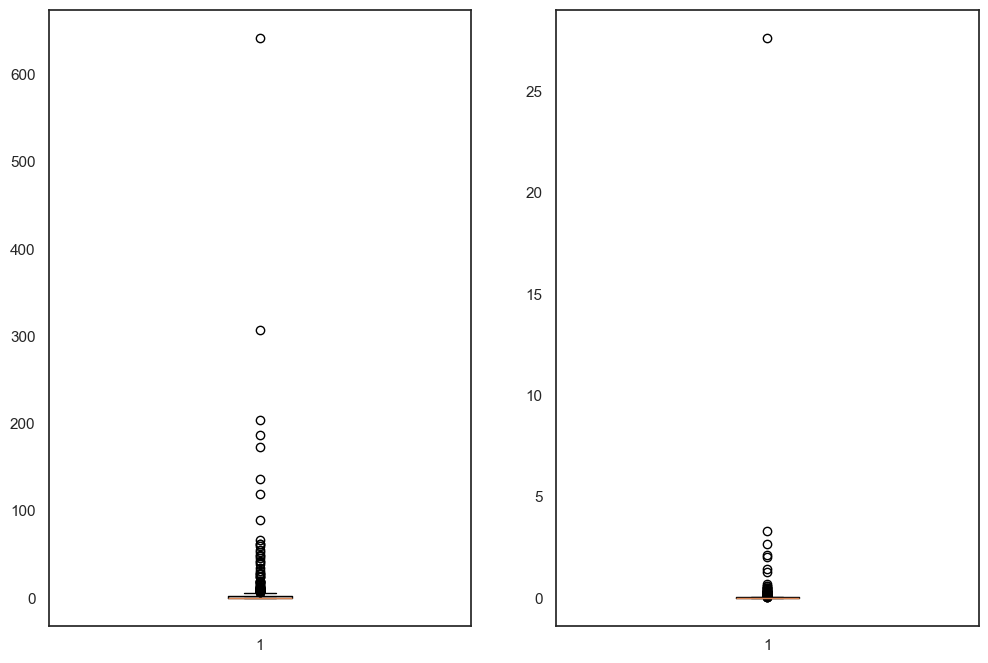

In [444]:
plt.subplot(1, 2,1)
plt.boxplot(errors_f)

plt.subplot(1, 2, 2)
plt.boxplot(errors_nf)

fig.suptitle('Error boxplot for Fraud and nonfraud')

In [446]:
print(sum(errors_nf>np.median(errors_f)))
print(sum(errors_f<np.median(errors_f)))
print(sum(errors_f<np.median(errors_nf)))
print(sum(errors_nf>np.median(errors_nf)))

26
203
4
394


In [448]:
print(errors_nf.shape)
print(errors_f.shape)

(788,)
(407,)


In [450]:
print(predictions_nf.shape)
print(predictions_f.shape)

(788, 29)
(407, 29)


In [452]:
test_pred = autoencoder.predict(X_test[:,:29])
test_recon  = (((test_pred-X_test)**2).mean(-1))

train_pred = autoencoder.predict(X_train_NF[:,:29])
mean_recon = (((train_pred - X_train_NF)**2).mean(-1).mean())

from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

scores_f1 = []
thres = []
th = 0
for i in range(100):
    th+=0.1
    fraud = (test_recon>mean_recon+th)
    scores_f1.append(f1_score(y_test,fraud))
    thres.append(th+mean_recon)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [454]:
X_test.shape


(1195, 29)

0.17395527425251633


array([[745,  43],
       [162, 245]], dtype=int64)

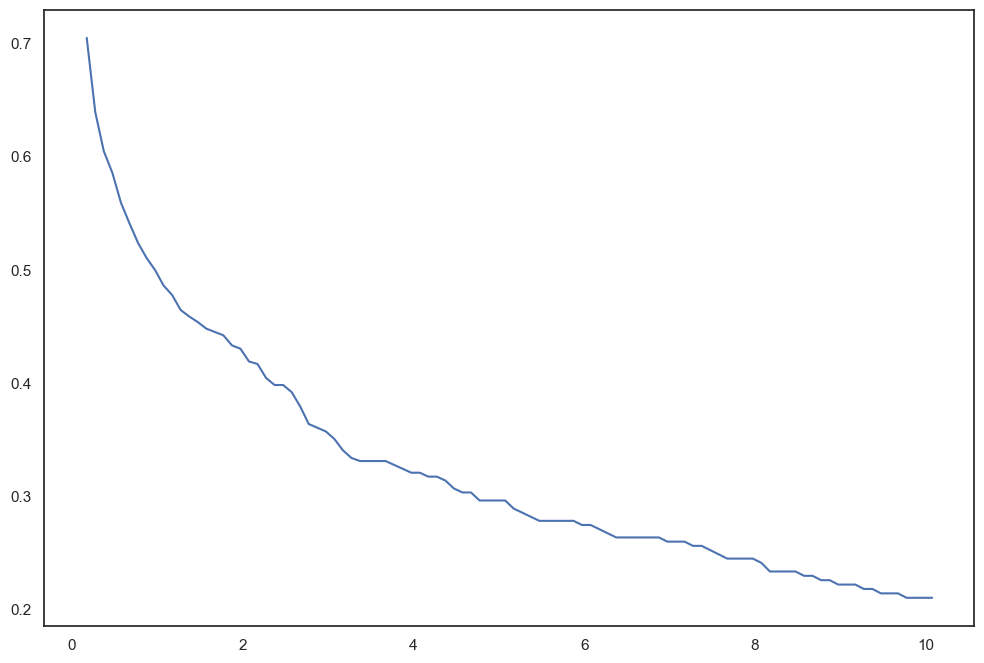

In [586]:
plt.plot(thres, scores_f1)

print(thres[np.array(scores_f1).argmax()])

fraud = (test_recon>thres[np.array(scores_f1).argmax()])

confusion_matrix(y_test, fraud)

In [460]:
predictions_eval=autoencoder.predict(X_eval[:,:29])


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [462]:
errors_eval=np.square(np.subtract(predictions_eval,X_eval[:,:29]))


In [464]:
threshold=0.1718219230420997

fraud_eval=(((errors_eval-X_eval[:,:29])**2).mean(-1))>threshold

In [466]:
print(confusion_matrix(y_true=X_eval[:,29],y_pred=fraud_eval,labels=[1,0]))


[[ 99   0]
 [189  11]]


In [468]:
ind_errors_nf=np.abs(np.subtract(predictions_nf,test_nf[:,:29]))
print(ind_errors_nf.shape)

(788, 29)


In [470]:
ind_errors_f=np.abs(np.subtract(predictions_f,test_f[:,:29]))
print(ind_errors_f.shape)

(407, 29)


In [472]:
X=np.concatenate((ind_errors_f,ind_errors_nf),axis=0)
print(X.shape)

(1195, 29)


In [474]:
x=np.array([1,0])
Y=np.repeat(x,[788,407])

In [476]:
print(Y.shape)
Y = np.expand_dims(Y, axis=1)
print(Y.shape)

(1195,)
(1195, 1)


In [478]:
X=np.concatenate((X,Y),axis=1)
print(X.shape)

(1195, 30)


In [480]:
map(str,range(X.shape[1]))


In [482]:
X=pd.DataFrame(X)
X.columns = map(str, range(X.shape[1]))

In [484]:
M = pd.melt(X, "29", var_name="var", value_name="value")
M['29'].astype('category')
M.tail()

,29,var,value
34650,0.0,28,0.029546
34651,0.0,28,0.318528
34652,0.0,28,0.009319
34653,0.0,28,0.055872
34654,0.0,28,0.060181


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


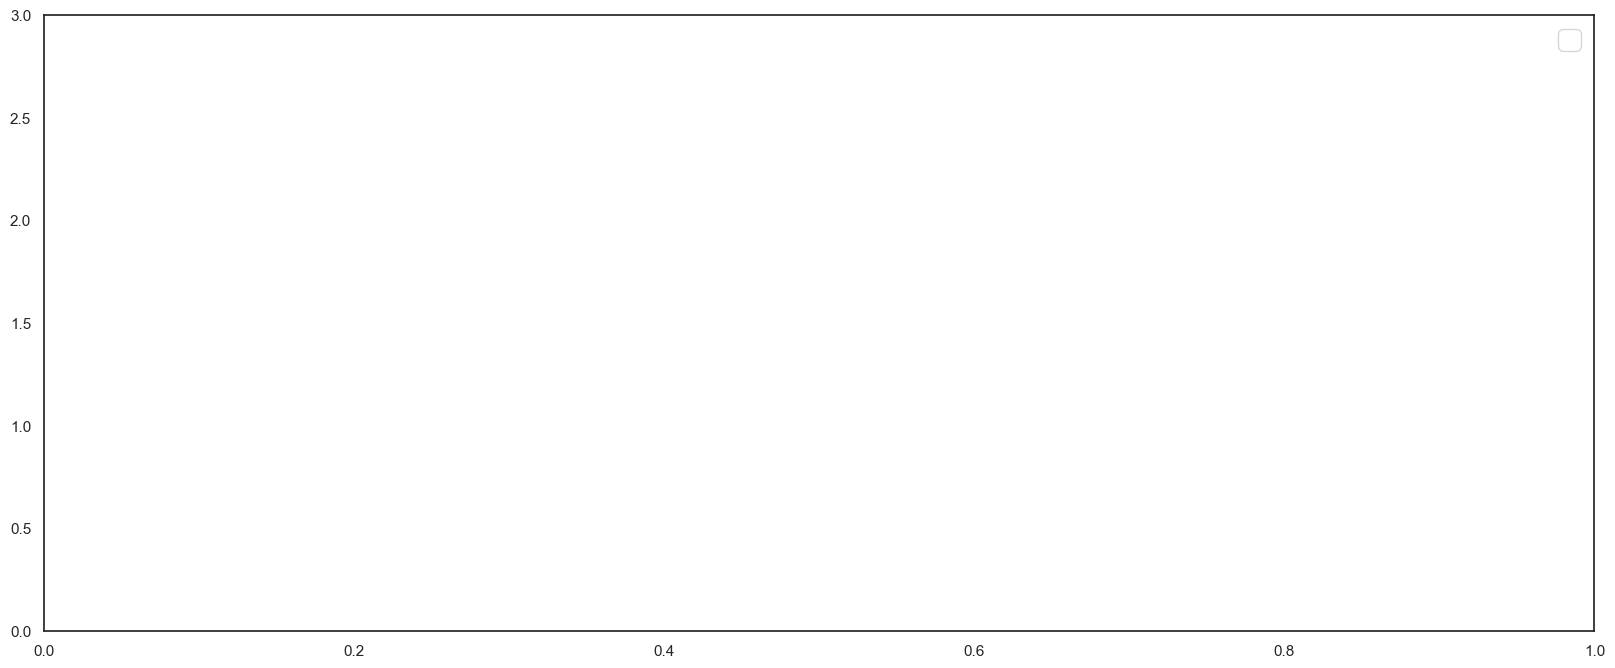

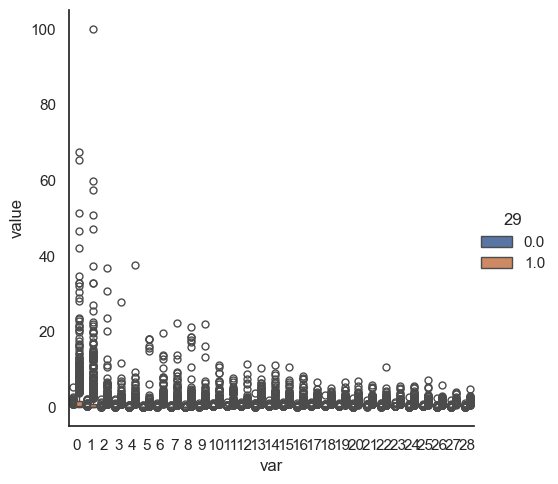

In [488]:
import seaborn as sns
import matplotlib.pyplot as plt

size = (20, 8)
fig, ax = plt.subplots(figsize=size)

# Use catplot instead of factorplot
g = sns.catplot(x="var", y="value", hue="29", data=M, kind='box', ax=ax)

ax.set_yscale("linear")  # Setting y scale to linear
ax.set_ybound(0, 3)      # Setting y-axis bounds
ax.legend(fontsize=20)   # Adjusting the font size of the legend

plt.show()


In [490]:

pred_nf=ind_errors_nf[:,[0,1,11,17,18,4,8,14]]
np.mean(pred_nf,axis=0)

array([0.34454527, 0.17735293, 0.08692066, 0.12736281, 0.11721594,
       0.07696334, 0.052471  , 0.09128862])

In [492]:

pred_f=ind_errors_f[:,[0,1,11,17,18,4,8,14]]
np.mean(pred_f,axis=0)

array([4.41804544, 3.79268068, 0.54493187, 0.57625201, 0.54834058,
       0.81147654, 0.63600492, 0.6272718 ])

In [494]:
percentile_nf=np.percentile(ind_errors_nf[:,[0,1,11,17,18,4,8,14]],[10,20,30,40,50,60,70,80,90,100],axis=0)


In [496]:
percentile_nf

array([[3.85377829e-02, 1.42350586e-02, 5.89912017e-03, 7.96787814e-03,
        8.11405175e-03, 7.18061163e-03, 1.85536180e-03, 4.70796526e-03],
       [7.78122789e-02, 2.71807086e-02, 9.79573070e-03, 1.93911893e-02,
        1.57647270e-02, 1.48012747e-02, 3.42076056e-03, 8.59930428e-03],
       [1.08845162e-01, 3.92345377e-02, 1.46531755e-02, 3.04580450e-02,
        3.08394812e-02, 1.96501123e-02, 4.67361359e-03, 1.51341473e-02],
       [1.39740994e-01, 5.91525788e-02, 2.35444282e-02, 4.79407928e-02,
        4.52391901e-02, 2.79072161e-02, 6.33759207e-03, 2.53105499e-02],
       [1.65239332e-01, 9.40509626e-02, 3.90767997e-02, 6.59907805e-02,
        6.26012430e-02, 3.74010243e-02, 9.53524610e-03, 3.89117343e-02],
       [2.23819483e-01, 1.20308283e-01, 5.89245360e-02, 9.17645117e-02,
        8.35596628e-02, 4.93698976e-02, 1.39756540e-02, 5.86767019e-02],
       [3.27745637e-01, 1.46283785e-01, 8.33133219e-02, 1.37035113e-01,
        1.15985072e-01, 6.60796547e-02, 2.21755429e-02, 8.

In [498]:
percentile_nf[:,7]


array([0.00470797, 0.0085993 , 0.01513415, 0.02531055, 0.03891173,
       0.0586767 , 0.08370274, 0.12158865, 0.202517  , 1.95137485])

In [500]:
percentile_f=np.percentile(ind_errors_f[:,[0,1,11,17,18,4,8,14]],[10,20,30,],axis=0)
np.percentile(ind_errors_f[:,[0,1,11,17,18,4,8,14]],[10,20,30,40,50,60,70,80,90,100],axis=0)

array([[1.63991196e-01, 8.66943519e-02, 3.82986158e-02, 3.46446489e-02,
        4.87906673e-02, 5.17910364e-02, 1.33708779e-02, 2.75612478e-02],
       [3.51255712e-01, 1.83662188e-01, 7.70302718e-02, 8.98620142e-02,
        9.09882170e-02, 1.08132408e-01, 2.65019854e-02, 5.83262419e-02],
       [6.11460939e-01, 3.32395898e-01, 1.11787445e-01, 1.41566282e-01,
        1.40313453e-01, 1.55975640e-01, 4.57257947e-02, 1.03131750e-01],
       [8.75589937e-01, 5.23714040e-01, 1.69669505e-01, 2.05412237e-01,
        2.16165934e-01, 2.28057689e-01, 6.54508638e-02, 1.43730784e-01],
       [1.29746997e+00, 8.00564468e-01, 2.22176128e-01, 2.88663203e-01,
        2.91953919e-01, 3.20459819e-01, 9.55897589e-02, 2.13846512e-01],
       [2.14378127e+00, 1.26867113e+00, 2.85076358e-01, 3.98102447e-01,
        4.06947886e-01, 4.80050743e-01, 1.40645398e-01, 3.24166118e-01],
       [3.61510185e+00, 2.41376792e+00, 4.09956823e-01, 5.70275634e-01,
        5.85956547e-01, 7.00974728e-01, 2.29691618e-01, 4.

In [502]:
percentile_f[:,7]


array([0.02756125, 0.05832624, 0.10313175])

In [504]:
thr= 0.10003411   #0.50795386       #0.32079228

test_pred = autoencoder.predict(X_test)
test_pred.shape

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(1195, 29)

In [506]:
recon_error= np.abs(np.subtract(test_pred,X_test[:,:29]))


In [508]:
recon_error.shape


(1195, 29)

In [510]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
fraud = (recon_error[:,1]>thr)
print("Recall=",recall_score(y_test,fraud))
print("Precision=",precision_score(y_test,fraud))
print("Accuracy=",accuracy_score(y_test,fraud))
print("F1-Score",f1_score(y_test,fraud))

Recall= 0.8796068796068796
Precision= 0.48509485094850946
Accuracy= 0.6410041841004184
F1-Score 0.6253275109170305


In [512]:
print(confusion_matrix(y_true=y_test,y_pred=fraud,labels=[1,0]))


[[358  49]
 [380 408]]


In [514]:
predictions_eval=autoencoder.predict(X_eval[:,:29])
predictions_eval.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(299, 29)

In [516]:
ind_errors_eval=np.abs(np.subtract(predictions_eval,X_eval[:,:29]))
ind_errors_eval.shape

(299, 29)

In [518]:
fraud_eval=ind_errors_eval[:,1]>thr
print("Recall",recall_score(X_eval[:,29],fraud_eval))
print("Precision",precision_score(X_eval[:,29],fraud_eval))
print("Accuracy",accuracy_score(X_eval[:,29],fraud_eval))
print("F1-Score",f1_score(X_eval[:,29],fraud_eval))

Recall 0.8484848484848485
Precision 0.47191011235955055
Accuracy 0.6354515050167224
F1-Score 0.6064981949458483


In [520]:
print(confusion_matrix(y_true=X_eval[:,29],y_pred=fraud_eval,labels=[1,0]))


[[ 84  15]
 [ 94 106]]


In [522]:
fraud_eval[:6]


array([ True, False, False, False,  True, False])

In [524]:
predictions_unseen=autoencoder.predict(test_pca[:,:29])
predictions_unseen.shape

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step


(1353, 29)

In [526]:
ind_errors_unseen=np.abs(np.subtract(predictions_unseen,test_pca[:,:29]))
ind_errors_unseen.shape

(1353, 29)

In [528]:
fraud_unseen=ind_errors_unseen[:,1]>thr


In [530]:
fraud_unseen.shape


(1353,)

In [532]:
fraud_unseen[:5]


array([False, False, False, False, False])

In [534]:
print("Recall",recall_score((log.predict_proba(X_teststd)[:,1]>0.60).astype(bool),fraud_unseen))
print("Precision",precision_score((log.predict_proba(X_teststd)[:,1]>0.60).astype(bool),fraud_unseen))
print("Accuracy",accuracy_score((log.predict_proba(X_teststd)[:,1]>0.60).astype(bool),fraud_unseen))
print("F1-Score",f1_score((log.predict_proba(X_teststd)[:,1]>0.60).astype(bool),fraud_unseen))

Recall 0.935672514619883
Precision 0.22889842632331903
Accuracy 0.5934959349593496
F1-Score 0.367816091954023


In [536]:
fraud_unseen=pd.DataFrame(fraud_unseen)


In [538]:
fraud_unseen.shape
fraud_unseen.head(2)

,0
0,False
1,False


In [540]:
Replacement = {1:'Yes',0:'No'}

AE_Labels=fraud_unseen[0].apply(lambda x : Replacement[x])

In [542]:
AE_Labels.value_counts()


0
Yes    699
No     654
Name: count, dtype: int64

In [544]:

submission_AutoEncoder=pd.DataFrame({"Provider":Test_category_removed_groupedbyProv_PF.Provider})
submission_AutoEncoder['PotentialFraud']=AE_Labels
submission_AutoEncoder.head(16)

,Provider,PotentialFraud
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No
5,PRV51019,No
6,PRV51020,Yes
7,PRV51022,No
8,PRV51028,No
9,PRV51033,Yes


In [546]:
submission_AutoEncoder.shape


(1353, 2)

In [548]:
#Autoencoder with 2 hidden layers

df = pd.DataFrame(train_pca)  #Again use train 
df.shape


(5410, 30)

In [550]:
df.isnull().values.any() 


False

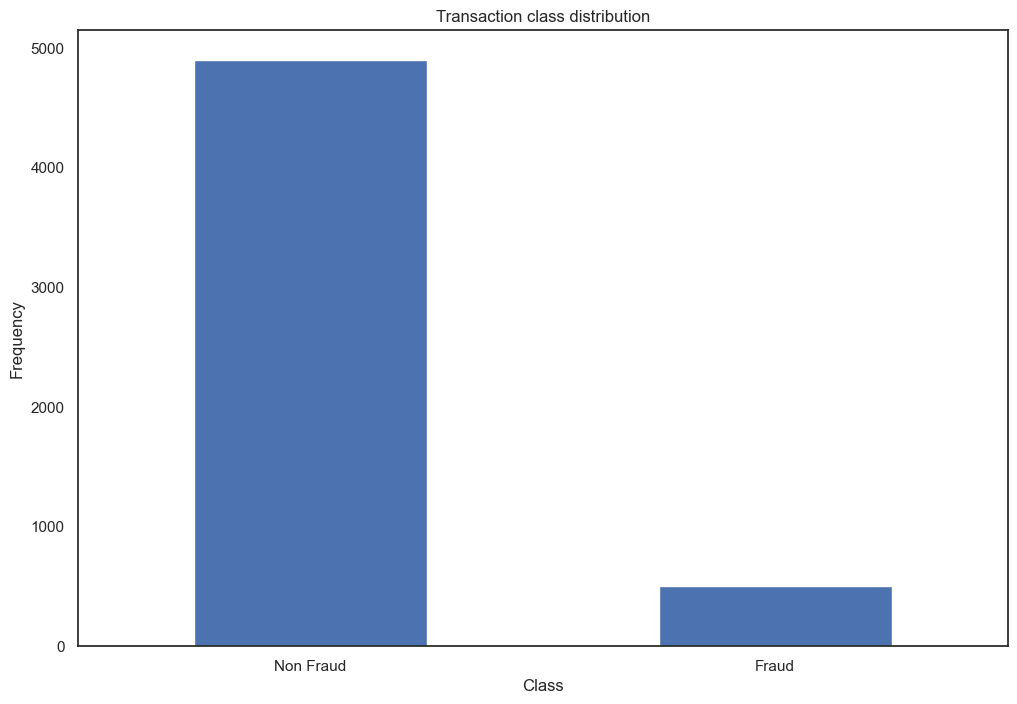

In [552]:
count_classes = pd.value_counts(df.iloc[:,29], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [554]:
frauds = df[df.iloc[:,29] == 1]
normal = df[df.iloc[:,29] == 0]
print('Fraud data shape:',frauds.shape)

Fraud data shape: (506, 30)


In [556]:
print('Normal data shape:',normal.shape)


Normal data shape: (4904, 30)


In [568]:
X_train_AE, X_test_AE = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train_AE = X_train_AE[X_train_AE.iloc[:,29] == 0]
X_train_AE = X_train_AE.drop([29], axis=1)
y_test_AE = X_test_AE[29]
X_test_AE = X_test_AE.drop([29], axis=1)
X_train_AE = X_train_AE.values
X_test_AE = X_test_AE.values
X_train_AE.shape

###df[ df.columns[[1,3]] ]



(3910, 29)

In [570]:
predictions = autoencoder.predict(X_test_AE)
mse = np.mean(np.power(X_test_AE - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test_AE})
error_df.describe()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,reconstruction_error,true_class
count,1082.000000,1082.000000
mean,0.915701,0.081331
std,19.627125,0.273469
min,0.000305,0.000000
25%,0.001871,0.000000
50%,0.008800,0.000000
75%,0.034442,0.000000
max,642.182203,1.000000


(0.0, 30.0)

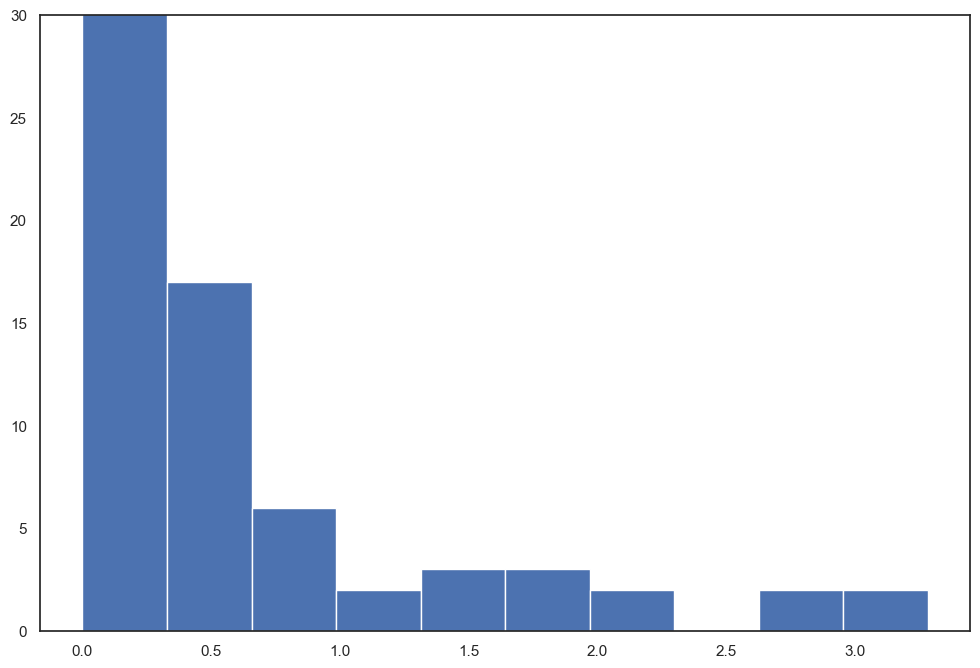

In [572]:
#Reconstruction error for Normal data
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

ax.set_ylim(0,30)

(0.0, 30.0)

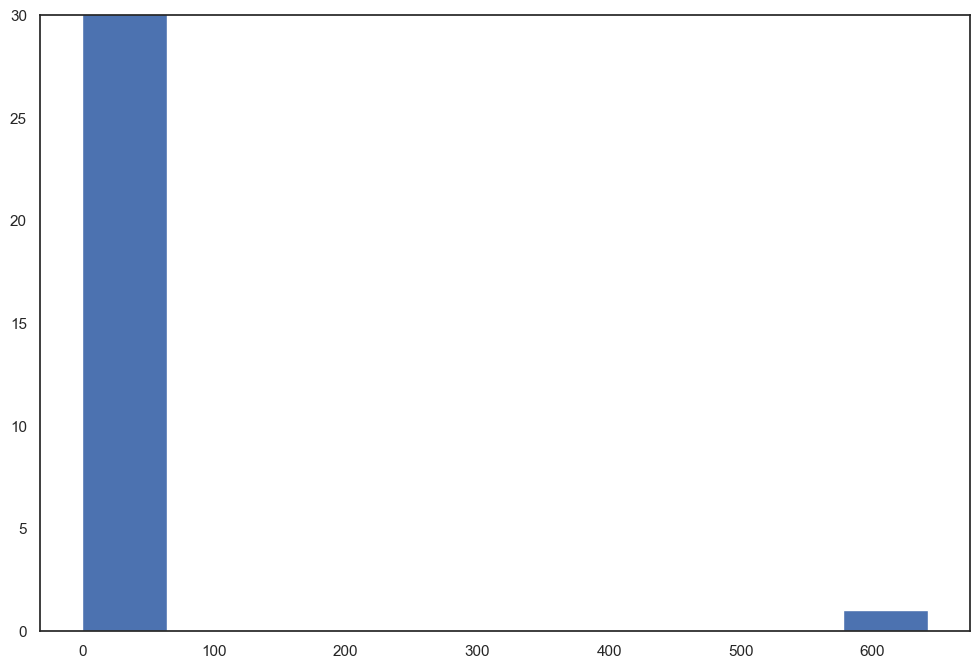

In [574]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)
ax.set_ylim(0,30)

In [576]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

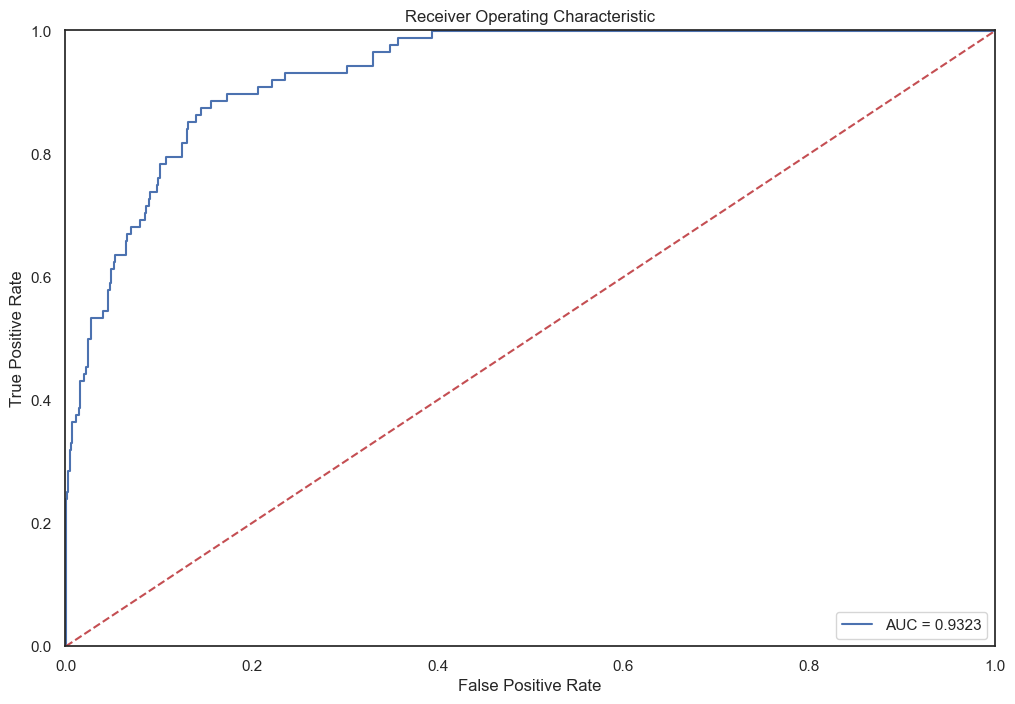

In [578]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
###ROC for errors and true class

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

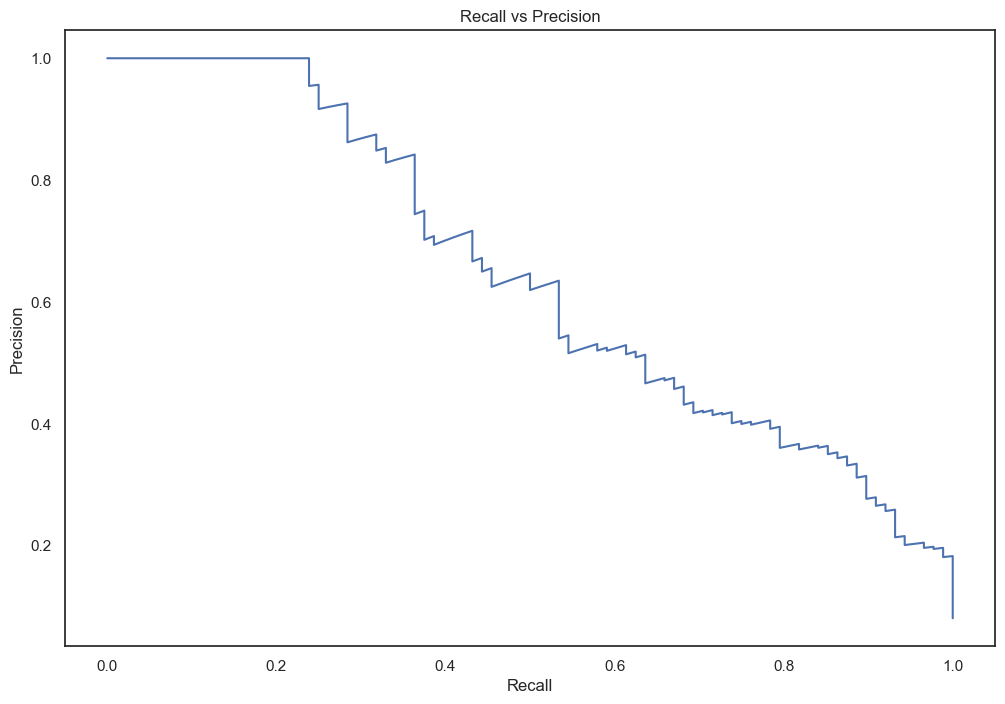

In [617]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

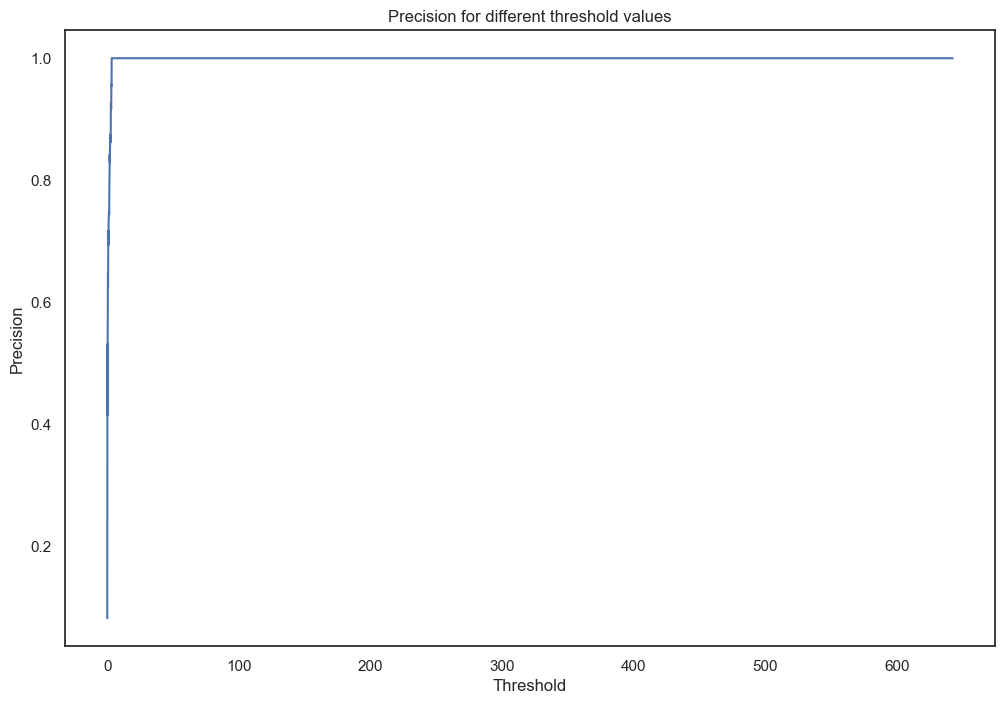

In [619]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

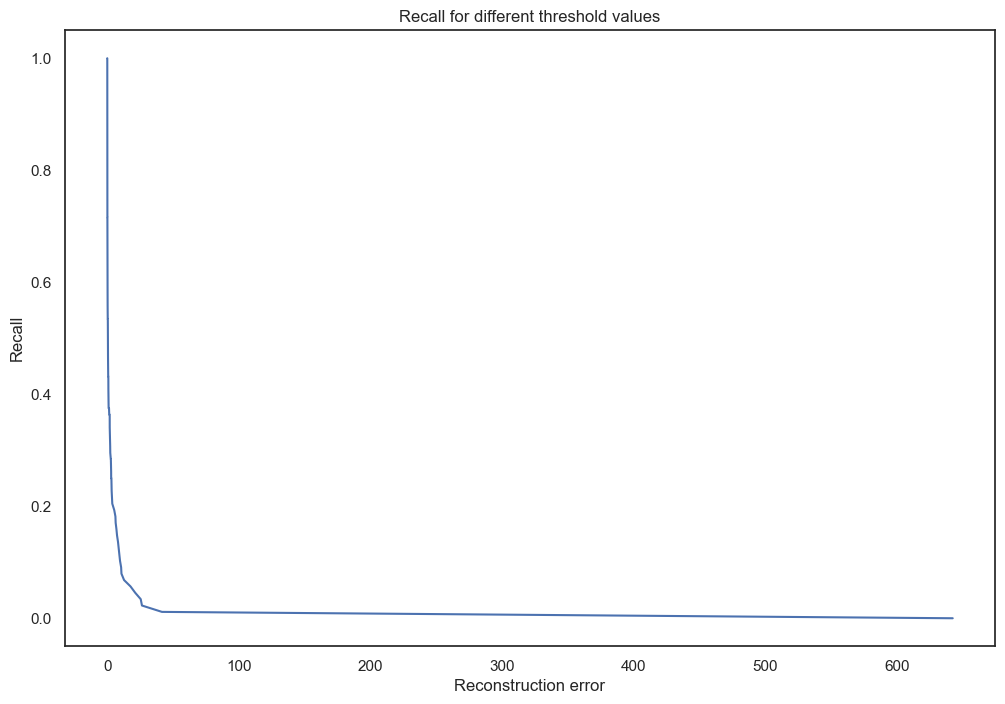

In [621]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [623]:
threshold =0.95


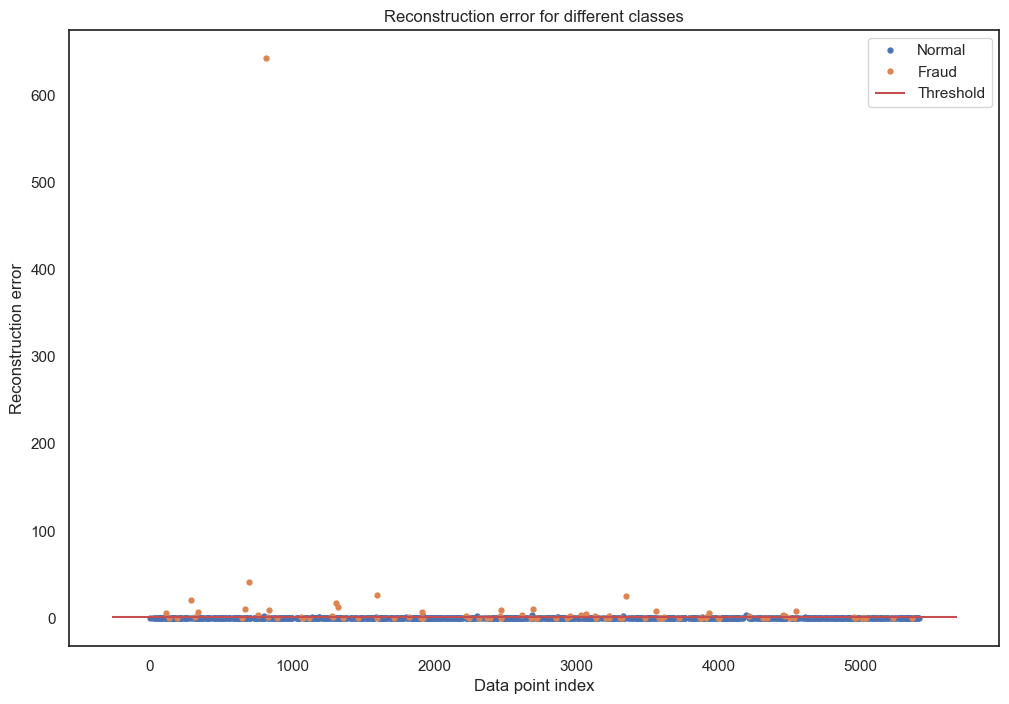

In [625]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

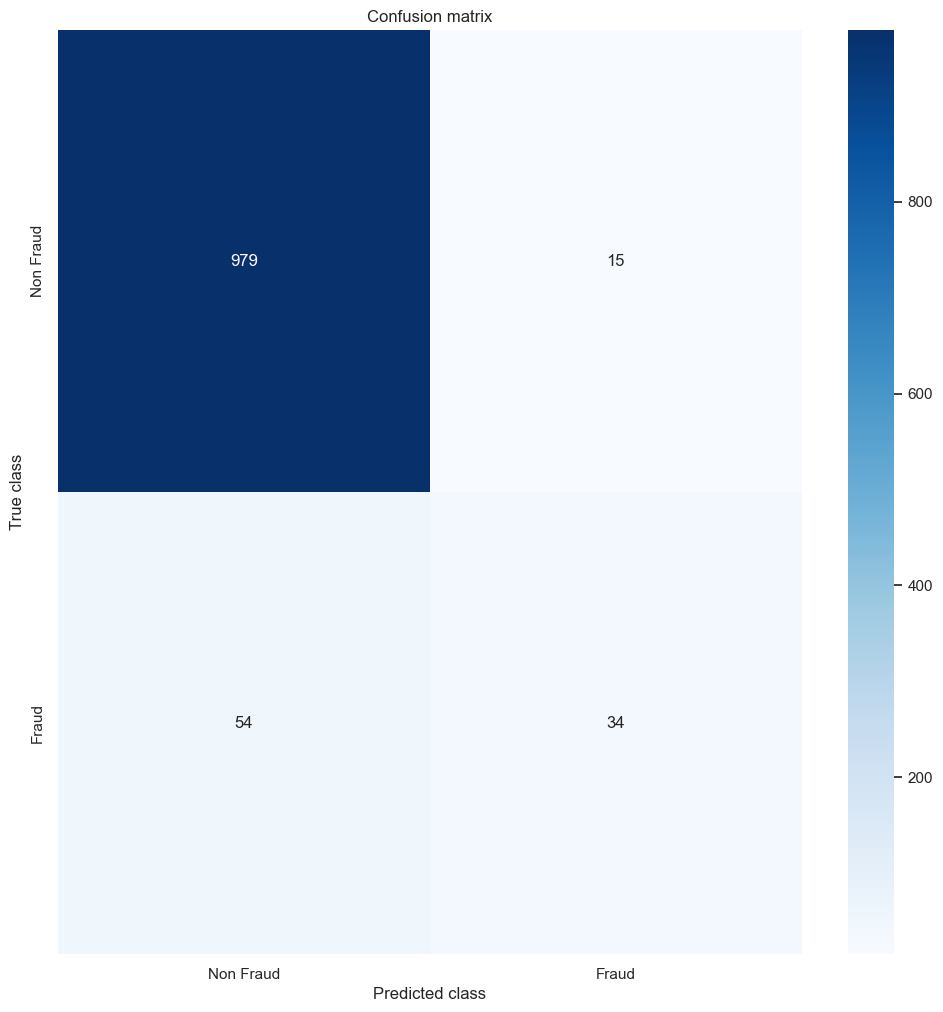

In [627]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred,labels=[0,1])
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap='Blues');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [629]:
print('F1_Score:',f1_score(error_df.true_class, y_pred))


F1_Score: 0.49635036496350365


In [633]:
cm1 = confusion_matrix(error_df.true_class, y_pred,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(error_df.true_class, y_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(error_df.true_class, y_pred)

print("AUC         :",AUC)

print("F1-Score Val  : ",f1_score(error_df.true_class, y_pred))

Confusion Matrix Val: 
 [[ 34  54]
 [ 15 979]]
Accuracy Val:  0.9362292051756007
Sensitivity Val:  0.38636363636363635
Specificity Val:  0.9849094567404426
Kappa Value : 0.46523887973640865
AUC         : 0.6856365465520394
F1-Score Val  :  0.49635036496350365
